Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.212942    7.484260    8.956694
3266 2017-01-16  8.537993    7.787020    9.264206
3267 2017-01-17  8.325428    7.552348    9.052547
3268 2017-01-18  8.158059    7.469064    8.876578
3269 2017-01-19  8.170046    7.448728    8.862193


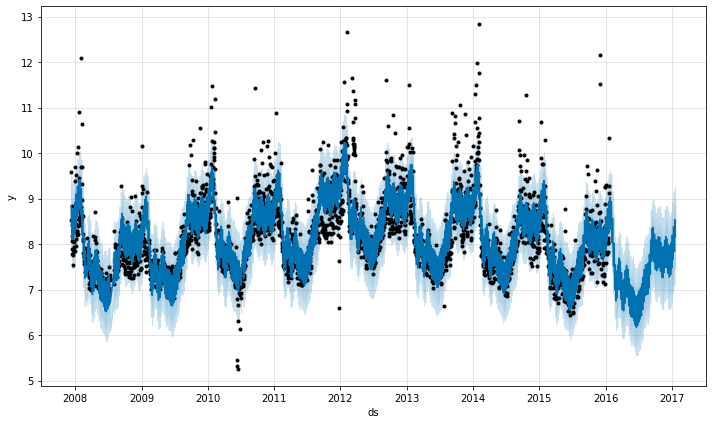

In [1]:
# 使用Prophet预测manning未来365天的页面流量
# 从2007年12月10日开始
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
df = pd.read_csv('./manning.csv')
#print(df.head())
#print(df.tail())
# 拟合模型
model = Prophet()
model.fit(df)

# 构建待预测日期数据框，periods = 365 代表除历史数据的日期外再往后推 365 天
future = model.make_future_dataframe(periods=365)
#print(future.tail())

# 预测数据集
forecast = model.predict(future)
#print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()


In [2]:
#print(forecast)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.195146,7.484260,8.956694,6.847619,7.537534,1.017796,1.017796,1.017796,0.048277,0.048277,0.048277,0.969519,0.969519,0.969519,0.0,0.0,0.0,8.212942
3266,2017-01-16,7.194129,7.787020,9.264206,6.846043,7.537794,1.343865,1.343865,1.343865,0.352294,0.352294,0.352294,0.991570,0.991570,0.991570,0.0,0.0,0.0,8.537993
3267,2017-01-17,7.193111,7.552348,9.052547,6.843195,7.538022,1.132317,1.132317,1.132317,0.119638,0.119638,0.119638,1.012679,1.012679,1.012679,0.0,0.0,0.0,8.325428
3268,2017-01-18,7.192094,7.469064,8.876578,6.840347,7.538199,0.965965,0.965965,0.965965,-0.066677,-0.066677,-0.066677,1.032642,1.032642,1.032642,0.0,0.0,0.0,8.158059
3269,2017-01-19,7.191077,7.448728,8.862193,6.837499,7.538376,0.978969,0.978969,0.978969,-0.072245,-0.072245,-0.072245,1.051214,1.051214,1.051214,0.0,0.0,0.0,8.170046


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


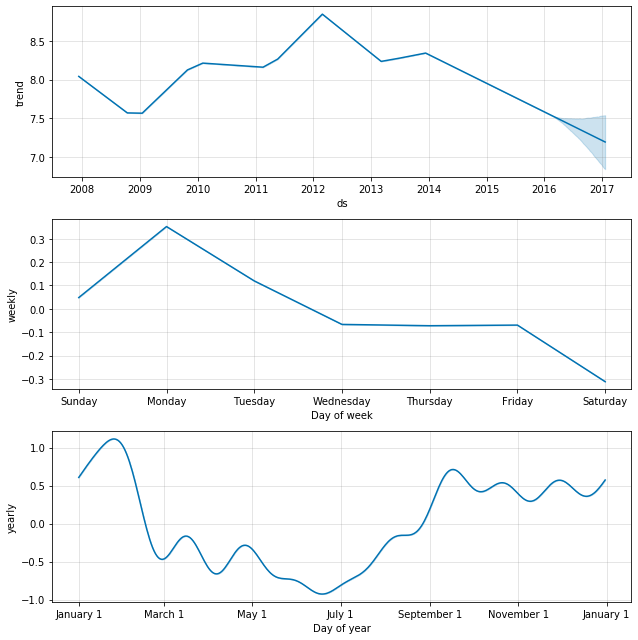

In [3]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds  cap
0    2007-12-10  8.5
1    2007-12-11  8.5
2    2007-12-12  8.5
3    2007-12-13  8.5
4    2007-12-14  8.5
...         ...  ...
4726 2021-01-15  8.5
4727 2021-01-16  8.5
4728 2021-01-17  8.5
4729 2021-01-18  8.5
4730 2021-01-19  8.5

[4731 rows x 2 columns]


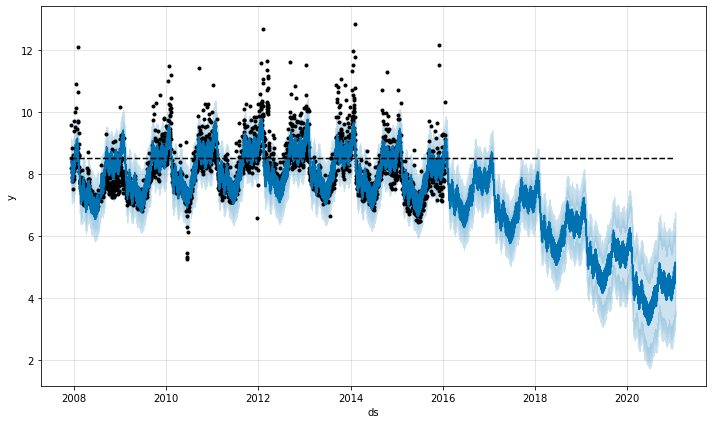

In [4]:
# 饱和增长
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)

# 预测未来 3 年的数据
future = m.make_future_dataframe(periods=1826)
# 将未来的承载能力设定得和历史数据一样
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)
print(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


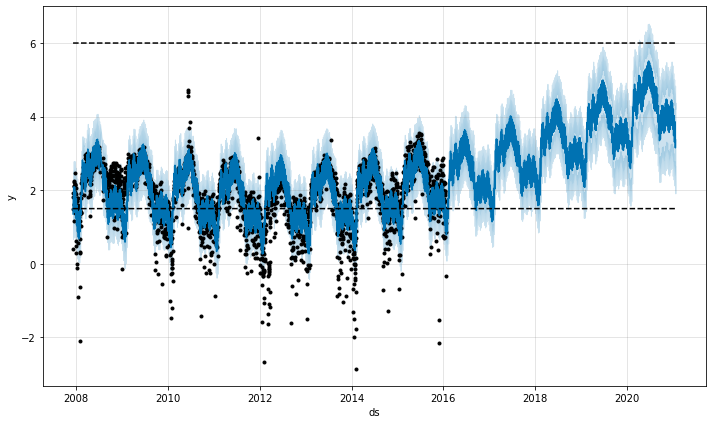

In [5]:
# 预测饱和减少
df['y'] = 10 - df['y']
df['cap'] = 6
# 设置下限
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)


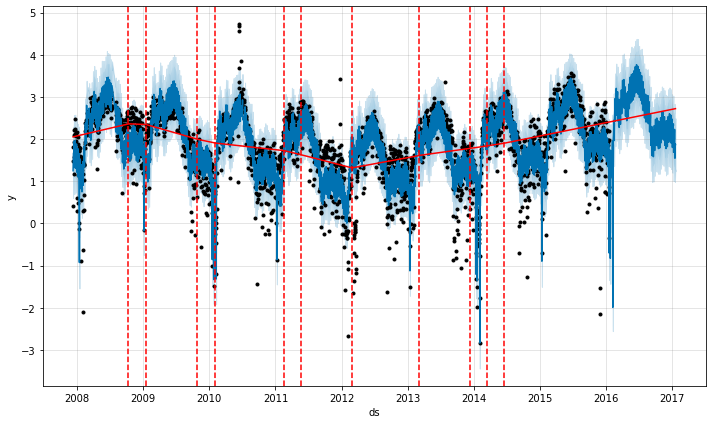

In [10]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
# plt.gca()获得当前的Axes对象ax
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), m, forecast)
print(m)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


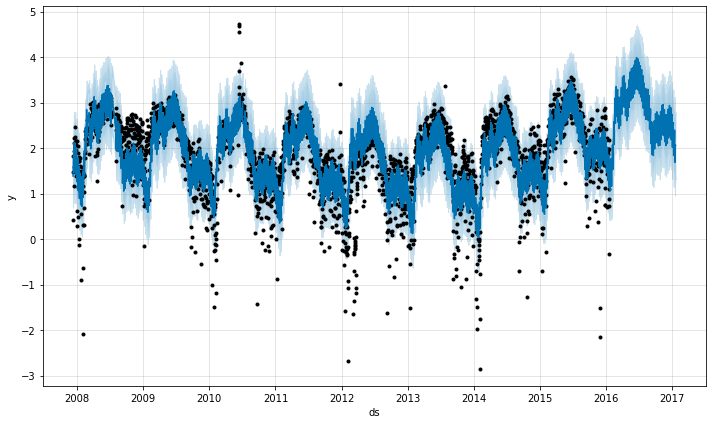

In [7]:
# 指定突变点的位置
m = Prophet(changepoints=['2014-01-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast);

In [8]:
# 对节假日建模
# 将节日看成是一个正态分布，把活动期间当做波峰，lower_window 以及upper_window 的窗口作为扩散
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#print(forecast)
# 通过 forecast 数据框，展示节假日效应
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]
# 可以使用 plot_forecast_component（从fbprophet.plot导入）来画出独立的节假日的成分

from fbprophet.plot import plot_forecast_component
m.plot_forecast_component(forecast, 'superbowl')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: 'Prophet' object has no attribute 'plot_forecast_component'

In [ ]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)
